# Creating Wordclouds with an alpha channel for arbitrary shapes

In [1]:
# Import
import requests
import wordcloud
import numpy as np
from os import path
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

%matplotlib inline

In [2]:
# Download some words for the wordcloud
url = 'https://www.pokewiki.de/Pok%C3%A9mon-Liste'
html = requests.get(url).text
bs = BeautifulSoup(html, 'lxml')
pokemon = ' '.join([elem.find('a').get_text().strip() for elem in bs.findAll('tr') if elem.find('a')])

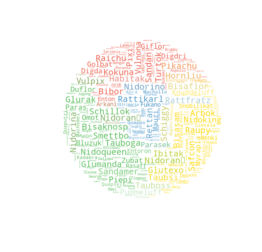

In [3]:
stopwords = set(STOPWORDS)

# Read the whole text.
text = {name:1 for name in pokemon.split(' ')}

# Load the mask image
image_path = 'build/chrome.png'
mask = np.array(Image.open(image_path))
image_colors = ImageColorGenerator(mask)

mask = np.clip(mask[:,:,-1], 1, 0)*255


# Generate wordcloud
wc = WordCloud(background_color="white", max_words=4000, mask=mask, max_font_size=20, stopwords=stopwords)
wc.generate_from_frequencies(text)

# Recolor wordcloud and display
wc.recolor(color_func=image_colors)
wc.to_file('build/Alpha_Channel_Wordcloud.png')

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()